### <a href="https://www5.cs.fau.de/fileadmin/research/datasets/fundus-images/all.zip">Dataset</a>

## Load dataset

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys
import segmentation_models as sm
# if you get an errror: module 'keras.utils.generic_utils' has no attribute 'get_custom_objects'
# open keras.py and change all 'init_keras_custom_objects' to 'init_tfkeras_custom_objects'

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, Callback, ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
from preprocess import train_val_test_split
from sklearn.metrics import classification_report
sys.path.append('../')
from load_images import load

In [4]:
img_size = (512, 512)
X, y, _ = load(img_size)

## Preprocessing + creating generators

In [5]:
batch_size = 2

X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X,y)

train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)
test_generator = test_datagen.flow(X_test, y_test, batch_size=batch_size)

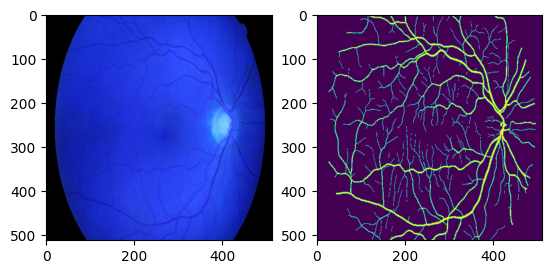

In [6]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(train_generator[1][0][0], cmap='gray')
ax[1].imshow(train_generator[1][1][0])
plt.show()

## Plot callback

In [6]:
class PlotCallback(Callback):
    def __init__(self, val_generator, num_epochs=1):
        super(PlotCallback, self).__init__()
        self.val_generator = val_generator
        self.num_epochs = num_epochs

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.num_epochs == 0:
            val_images, val_masks = next(iter(self.val_generator))
            predicted_masks = self.model.predict(val_images)
            
            fig, ax = plt.subplots(1, 3, figsize=(8, 4))
            
            ax[0].imshow(val_images[0][:,:,1])
            ax[0].set_title("Ground Truth")

            ax[1].imshow(val_masks[0])
            ax[1].set_title("Mask")

            ax[2].imshow(predicted_masks[0])
            ax[2].set_title("Predicted")

            plt.show()
            

## Training

Epoch 1/300


2023-05-28 12:33:17.091497: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


15/15 [==============================] - 10s 386ms/step - loss: 0.9026 - accuracy: 0.3494 - val_loss: 1.0666 - val_accuracy: 0.1297
Epoch 2/300
15/15 [==============================] - 3s 205ms/step - loss: 0.7696 - accuracy: 0.5158 - val_loss: 1.2051 - val_accuracy: 0.0941
Epoch 3/300
15/15 [==============================] - 3s 205ms/step - loss: 0.6793 - accuracy: 0.6550 - val_loss: 1.3347 - val_accuracy: 0.0903
Epoch 4/300
15/15 [==============================] - 3s 206ms/step - loss: 0.6151 - accuracy: 0.7645 - val_loss: 1.2065 - val_accuracy: 0.0956
Epoch 5/300
15/15 [==============================] - 4s 252ms/step - loss: 0.5642 - accuracy: 0.8404 - val_loss: 1.0055 - val_accuracy: 0.1293
Epoch 6/300
1/1 [==============================] - 1s 658ms/steposs: 0.5206 - accuracy: 0.88


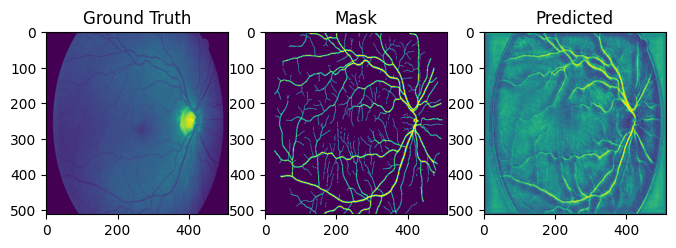

15/15 [==============================] - 5s 317ms/step - loss: 0.5206 - accuracy: 0.8829 - val_loss: 0.8109 - val_accuracy: 0.3153
Epoch 7/300
15/15 [==============================] - 4s 250ms/step - loss: 0.4822 - accuracy: 0.9085 - val_loss: 0.6554 - val_accuracy: 0.6528
Epoch 8/300
15/15 [==============================] - 4s 250ms/step - loss: 0.4448 - accuracy: 0.9241 - val_loss: 0.5440 - val_accuracy: 0.8842
Epoch 9/300
15/15 [==============================] - 3s 206ms/step - loss: 0.4133 - accuracy: 0.9338 - val_loss: 0.7940 - val_accuracy: 0.8361
Epoch 10/300
15/15 [==============================] - 4s 249ms/step - loss: 0.3855 - accuracy: 0.9415 - val_loss: 0.4875 - val_accuracy: 0.9281
Epoch 11/300
15/15 [==============================] - 4s 249ms/step - loss: 0.3620 - accuracy: 0.9461 - val_loss: 0.4525 - val_accuracy: 0.9271
Epoch 12/300
1/1 [==============================] - 0s 16ms/steploss: 0.3399 - accuracy: 0.94


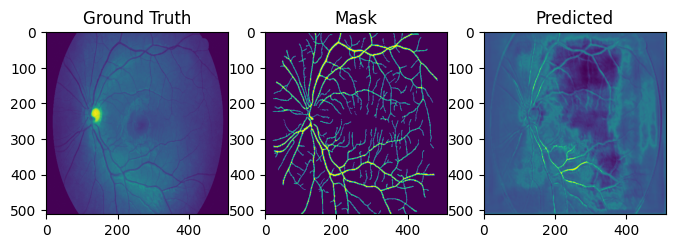

15/15 [==============================] - 4s 270ms/step - loss: 0.3399 - accuracy: 0.9496 - val_loss: 0.4403 - val_accuracy: 0.9269
Epoch 13/300
15/15 [==============================] - 3s 205ms/step - loss: 0.3211 - accuracy: 0.9526 - val_loss: 0.6098 - val_accuracy: 0.8758
Epoch 14/300
15/15 [==============================] - 4s 250ms/step - loss: 0.3048 - accuracy: 0.9547 - val_loss: 0.4403 - val_accuracy: 0.9055
Epoch 15/300
15/15 [==============================] - 4s 252ms/step - loss: 0.2887 - accuracy: 0.9561 - val_loss: 0.3869 - val_accuracy: 0.9269
Epoch 16/300
15/15 [==============================] - 4s 249ms/step - loss: 0.2742 - accuracy: 0.9582 - val_loss: 0.3541 - val_accuracy: 0.9271
Epoch 17/300
15/15 [==============================] - 3s 206ms/step - loss: 0.2601 - accuracy: 0.9592 - val_loss: 0.3545 - val_accuracy: 0.9283
Epoch 18/300
1/1 [==============================] - 0s 16ms/steploss: 0.2478 - accuracy: 0.96


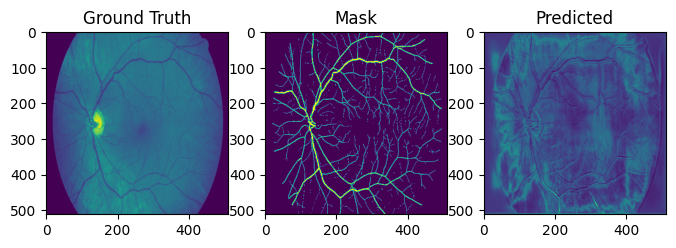

15/15 [==============================] - 4s 268ms/step - loss: 0.2478 - accuracy: 0.9600 - val_loss: 0.3499 - val_accuracy: 0.9287
Epoch 19/300
15/15 [==============================] - 4s 249ms/step - loss: 0.2371 - accuracy: 0.9607 - val_loss: 0.3421 - val_accuracy: 0.9297
Epoch 20/300
15/15 [==============================] - 3s 206ms/step - loss: 0.2283 - accuracy: 0.9616 - val_loss: 0.3444 - val_accuracy: 0.9266
Epoch 21/300
15/15 [==============================] - 3s 206ms/step - loss: 0.2205 - accuracy: 0.9620 - val_loss: 0.3450 - val_accuracy: 0.9193
Epoch 22/300
15/15 [==============================] - 4s 249ms/step - loss: 0.2135 - accuracy: 0.9623 - val_loss: 0.3009 - val_accuracy: 0.9343
Epoch 23/300
15/15 [==============================] - 4s 252ms/step - loss: 0.2065 - accuracy: 0.9627 - val_loss: 0.2925 - val_accuracy: 0.9365
Epoch 24/300
1/1 [==============================] - 0s 16ms/steploss: 0.1999 - accuracy: 0.96


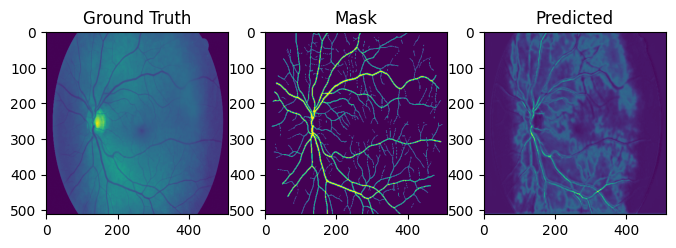

15/15 [==============================] - 4s 274ms/step - loss: 0.1999 - accuracy: 0.9635 - val_loss: 0.2701 - val_accuracy: 0.9432
Epoch 25/300
15/15 [==============================] - 4s 251ms/step - loss: 0.1941 - accuracy: 0.9637 - val_loss: 0.2634 - val_accuracy: 0.9441
Epoch 26/300
15/15 [==============================] - 4s 253ms/step - loss: 0.1884 - accuracy: 0.9645 - val_loss: 0.2498 - val_accuracy: 0.9485
Epoch 27/300
15/15 [==============================] - 4s 252ms/step - loss: 0.1831 - accuracy: 0.9647 - val_loss: 0.2446 - val_accuracy: 0.9488
Epoch 28/300
15/15 [==============================] - 4s 250ms/step - loss: 0.1782 - accuracy: 0.9650 - val_loss: 0.2279 - val_accuracy: 0.9508
Epoch 29/300
15/15 [==============================] - 4s 249ms/step - loss: 0.1735 - accuracy: 0.9655 - val_loss: 0.2081 - val_accuracy: 0.9539
Epoch 30/300
1/1 [==============================] - 0s 18ms/steploss: 0.1696 - accuracy: 0.96


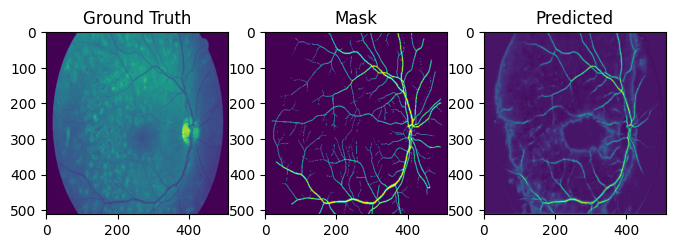

15/15 [==============================] - 4s 269ms/step - loss: 0.1696 - accuracy: 0.9656 - val_loss: 0.1957 - val_accuracy: 0.9556
Epoch 31/300
15/15 [==============================] - 4s 264ms/step - loss: 0.1655 - accuracy: 0.9660 - val_loss: 0.1877 - val_accuracy: 0.9567
Epoch 32/300
15/15 [==============================] - 4s 264ms/step - loss: 0.1615 - accuracy: 0.9661 - val_loss: 0.1801 - val_accuracy: 0.9582
Epoch 33/300
15/15 [==============================] - 4s 267ms/step - loss: 0.1576 - accuracy: 0.9664 - val_loss: 0.1756 - val_accuracy: 0.9600
Epoch 34/300
15/15 [==============================] - 4s 265ms/step - loss: 0.1537 - accuracy: 0.9670 - val_loss: 0.1710 - val_accuracy: 0.9601
Epoch 35/300
15/15 [==============================] - 4s 266ms/step - loss: 0.1505 - accuracy: 0.9671 - val_loss: 0.1677 - val_accuracy: 0.9608
Epoch 36/300
1/1 [==============================] - 0s 16ms/steploss: 0.1475 - accuracy: 0.96


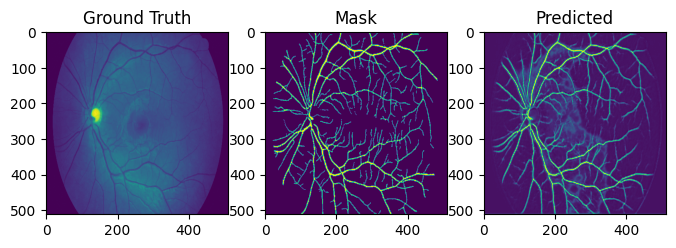

15/15 [==============================] - 4s 283ms/step - loss: 0.1475 - accuracy: 0.9672 - val_loss: 0.1632 - val_accuracy: 0.9614
Epoch 37/300
15/15 [==============================] - 4s 265ms/step - loss: 0.1448 - accuracy: 0.9671 - val_loss: 0.1579 - val_accuracy: 0.9626
Epoch 38/300
15/15 [==============================] - 3s 206ms/step - loss: 0.1416 - accuracy: 0.9675 - val_loss: 0.1591 - val_accuracy: 0.9617
Epoch 39/300
15/15 [==============================] - 4s 264ms/step - loss: 0.1394 - accuracy: 0.9675 - val_loss: 0.1572 - val_accuracy: 0.9610
Epoch 40/300
15/15 [==============================] - 4s 267ms/step - loss: 0.1363 - accuracy: 0.9679 - val_loss: 0.1505 - val_accuracy: 0.9620
Epoch 41/300
15/15 [==============================] - 4s 266ms/step - loss: 0.1334 - accuracy: 0.9684 - val_loss: 0.1491 - val_accuracy: 0.9621
Epoch 42/300
1/1 [==============================] - 0s 16ms/steploss: 0.1310 - accuracy: 0.96


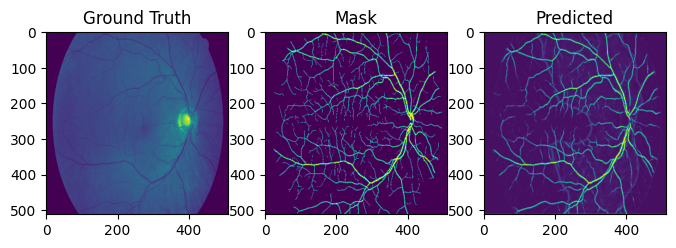

15/15 [==============================] - 4s 281ms/step - loss: 0.1310 - accuracy: 0.9685 - val_loss: 0.1450 - val_accuracy: 0.9630
Epoch 43/300
15/15 [==============================] - 4s 267ms/step - loss: 0.1289 - accuracy: 0.9685 - val_loss: 0.1432 - val_accuracy: 0.9637
Epoch 44/300
15/15 [==============================] - 4s 265ms/step - loss: 0.1261 - accuracy: 0.9689 - val_loss: 0.1397 - val_accuracy: 0.9636
Epoch 45/300
15/15 [==============================] - 4s 267ms/step - loss: 0.1241 - accuracy: 0.9690 - val_loss: 0.1388 - val_accuracy: 0.9635
Epoch 46/300
15/15 [==============================] - 4s 266ms/step - loss: 0.1215 - accuracy: 0.9695 - val_loss: 0.1342 - val_accuracy: 0.9649
Epoch 47/300
15/15 [==============================] - 4s 264ms/step - loss: 0.1202 - accuracy: 0.9691 - val_loss: 0.1339 - val_accuracy: 0.9638
Epoch 48/300
1/1 [==============================] - 0s 16ms/steploss: 0.1178 - accuracy: 0.96


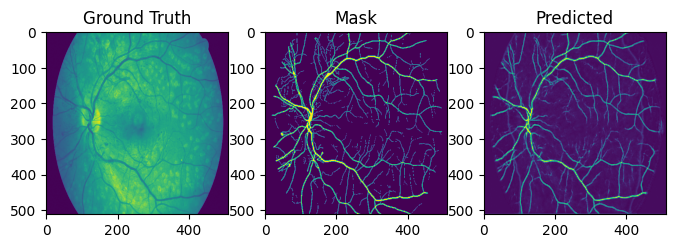

15/15 [==============================] - 4s 285ms/step - loss: 0.1178 - accuracy: 0.9697 - val_loss: 0.1325 - val_accuracy: 0.9642
Epoch 49/300
15/15 [==============================] - 4s 264ms/step - loss: 0.1157 - accuracy: 0.9700 - val_loss: 0.1302 - val_accuracy: 0.9648
Epoch 50/300
15/15 [==============================] - 4s 265ms/step - loss: 0.1136 - accuracy: 0.9703 - val_loss: 0.1285 - val_accuracy: 0.9651
Epoch 51/300
15/15 [==============================] - 4s 262ms/step - loss: 0.1122 - accuracy: 0.9704 - val_loss: 0.1269 - val_accuracy: 0.9646
Epoch 52/300
15/15 [==============================] - 4s 269ms/step - loss: 0.1102 - accuracy: 0.9707 - val_loss: 0.1265 - val_accuracy: 0.9652
Epoch 53/300
15/15 [==============================] - 4s 266ms/step - loss: 0.1083 - accuracy: 0.9711 - val_loss: 0.1245 - val_accuracy: 0.9652
Epoch 54/300
1/1 [==============================] - 0s 16ms/steploss: 0.1071 - accuracy: 0.97


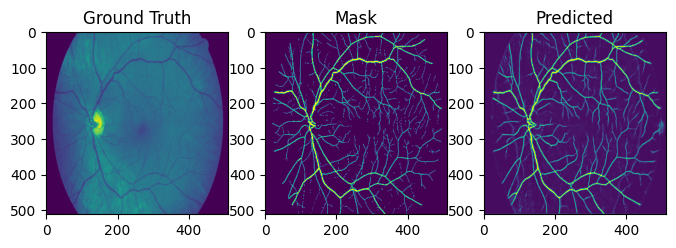

15/15 [==============================] - 4s 286ms/step - loss: 0.1071 - accuracy: 0.9711 - val_loss: 0.1227 - val_accuracy: 0.9653
Epoch 55/300
15/15 [==============================] - 3s 206ms/step - loss: 0.1056 - accuracy: 0.9712 - val_loss: 0.1235 - val_accuracy: 0.9651
Epoch 56/300
15/15 [==============================] - 4s 265ms/step - loss: 0.1040 - accuracy: 0.9715 - val_loss: 0.1209 - val_accuracy: 0.9658
Epoch 57/300
15/15 [==============================] - 4s 263ms/step - loss: 0.1027 - accuracy: 0.9716 - val_loss: 0.1201 - val_accuracy: 0.9652
Epoch 58/300
15/15 [==============================] - 4s 274ms/step - loss: 0.1012 - accuracy: 0.9719 - val_loss: 0.1185 - val_accuracy: 0.9661
Epoch 59/300
15/15 [==============================] - 4s 266ms/step - loss: 0.0998 - accuracy: 0.9721 - val_loss: 0.1176 - val_accuracy: 0.9657
Epoch 60/300
1/1 [==============================] - 0s 16ms/steploss: 0.0986 - accuracy: 0.97


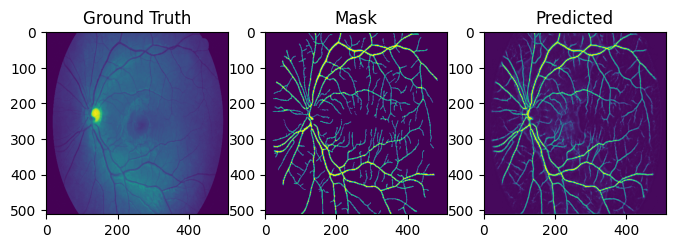

15/15 [==============================] - 4s 283ms/step - loss: 0.0986 - accuracy: 0.9723 - val_loss: 0.1164 - val_accuracy: 0.9657
Epoch 61/300
15/15 [==============================] - 4s 264ms/step - loss: 0.0974 - accuracy: 0.9726 - val_loss: 0.1148 - val_accuracy: 0.9662
Epoch 62/300
15/15 [==============================] - 3s 205ms/step - loss: 0.0958 - accuracy: 0.9729 - val_loss: 0.1151 - val_accuracy: 0.9656
Epoch 63/300
15/15 [==============================] - 4s 265ms/step - loss: 0.0945 - accuracy: 0.9730 - val_loss: 0.1134 - val_accuracy: 0.9658
Epoch 64/300
15/15 [==============================] - 4s 268ms/step - loss: 0.0937 - accuracy: 0.9731 - val_loss: 0.1124 - val_accuracy: 0.9658
Epoch 65/300
15/15 [==============================] - 4s 266ms/step - loss: 0.0927 - accuracy: 0.9732 - val_loss: 0.1124 - val_accuracy: 0.9664
Epoch 66/300
1/1 [==============================] - 0s 16ms/steploss: 0.0915 - accuracy: 0.97


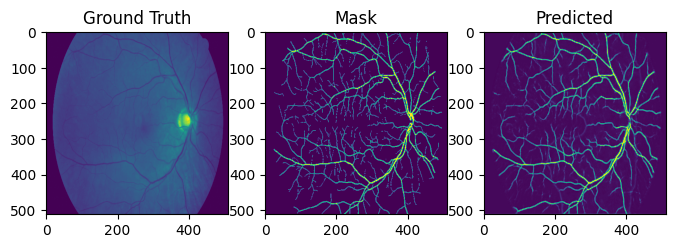

15/15 [==============================] - 4s 303ms/step - loss: 0.0915 - accuracy: 0.9735 - val_loss: 0.1111 - val_accuracy: 0.9659
Epoch 67/300
15/15 [==============================] - 3s 206ms/step - loss: 0.0901 - accuracy: 0.9738 - val_loss: 0.1112 - val_accuracy: 0.9662
Epoch 68/300
15/15 [==============================] - 4s 263ms/step - loss: 0.0895 - accuracy: 0.9737 - val_loss: 0.1103 - val_accuracy: 0.9659
Epoch 69/300
15/15 [==============================] - 4s 267ms/step - loss: 0.0877 - accuracy: 0.9744 - val_loss: 0.1089 - val_accuracy: 0.9661
Epoch 70/300
15/15 [==============================] - 4s 274ms/step - loss: 0.0866 - accuracy: 0.9745 - val_loss: 0.1082 - val_accuracy: 0.9661
Epoch 71/300
15/15 [==============================] - 3s 206ms/step - loss: 0.0861 - accuracy: 0.9745 - val_loss: 0.1083 - val_accuracy: 0.9658
Epoch 72/300
1/1 [==============================] - 0s 17ms/steploss: 0.0849 - accuracy: 0.97


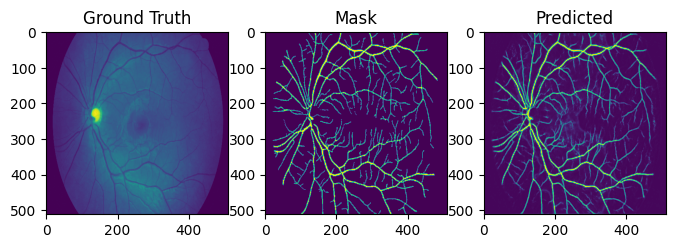

15/15 [==============================] - 4s 284ms/step - loss: 0.0849 - accuracy: 0.9748 - val_loss: 0.1078 - val_accuracy: 0.9658
Epoch 73/300
15/15 [==============================] - 4s 265ms/step - loss: 0.0840 - accuracy: 0.9749 - val_loss: 0.1068 - val_accuracy: 0.9662
Epoch 74/300
15/15 [==============================] - 4s 266ms/step - loss: 0.0827 - accuracy: 0.9754 - val_loss: 0.1060 - val_accuracy: 0.9664
Epoch 75/300
15/15 [==============================] - 4s 267ms/step - loss: 0.0822 - accuracy: 0.9752 - val_loss: 0.1057 - val_accuracy: 0.9662
Epoch 76/300
15/15 [==============================] - 4s 265ms/step - loss: 0.0809 - accuracy: 0.9756 - val_loss: 0.1050 - val_accuracy: 0.9664
Epoch 77/300
15/15 [==============================] - 3s 206ms/step - loss: 0.0806 - accuracy: 0.9756 - val_loss: 0.1053 - val_accuracy: 0.9662
Epoch 78/300
1/1 [==============================] - 0s 17ms/steploss: 0.0798 - accuracy: 0.97


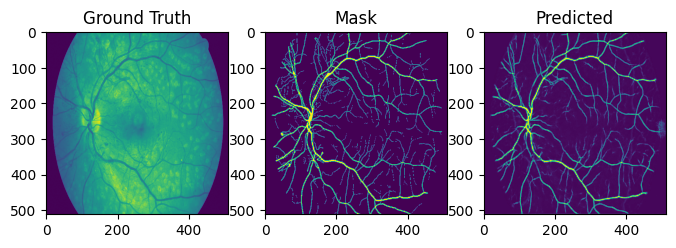

15/15 [==============================] - 4s 283ms/step - loss: 0.0798 - accuracy: 0.9758 - val_loss: 0.1040 - val_accuracy: 0.9663
Epoch 79/300
15/15 [==============================] - 4s 263ms/step - loss: 0.0788 - accuracy: 0.9759 - val_loss: 0.1032 - val_accuracy: 0.9666
Epoch 80/300
15/15 [==============================] - 4s 264ms/step - loss: 0.0780 - accuracy: 0.9762 - val_loss: 0.1030 - val_accuracy: 0.9664
Epoch 81/300
15/15 [==============================] - 4s 266ms/step - loss: 0.0766 - accuracy: 0.9766 - val_loss: 0.1025 - val_accuracy: 0.9667
Epoch 82/300
15/15 [==============================] - 3s 206ms/step - loss: 0.0762 - accuracy: 0.9765 - val_loss: 0.1027 - val_accuracy: 0.9664
Epoch 83/300
15/15 [==============================] - 4s 265ms/step - loss: 0.0751 - accuracy: 0.9768 - val_loss: 0.1020 - val_accuracy: 0.9664
Epoch 84/300
1/1 [==============================] - 0s 16ms/steploss: 0.0743 - accuracy: 0.97


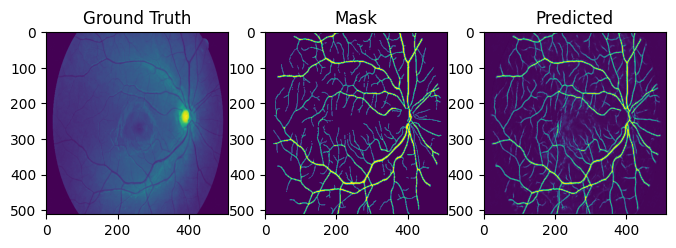

15/15 [==============================] - 4s 282ms/step - loss: 0.0743 - accuracy: 0.9770 - val_loss: 0.1016 - val_accuracy: 0.9665
Epoch 85/300
15/15 [==============================] - 4s 264ms/step - loss: 0.0733 - accuracy: 0.9774 - val_loss: 0.1016 - val_accuracy: 0.9664
Epoch 86/300
15/15 [==============================] - 4s 267ms/step - loss: 0.0724 - accuracy: 0.9776 - val_loss: 0.1005 - val_accuracy: 0.9666
Epoch 87/300
15/15 [==============================] - 3s 206ms/step - loss: 0.0726 - accuracy: 0.9773 - val_loss: 0.1010 - val_accuracy: 0.9663
Epoch 88/300
15/15 [==============================] - 4s 266ms/step - loss: 0.0716 - accuracy: 0.9776 - val_loss: 0.1003 - val_accuracy: 0.9666
Epoch 89/300
15/15 [==============================] - 4s 277ms/step - loss: 0.0705 - accuracy: 0.9781 - val_loss: 0.0998 - val_accuracy: 0.9667
Epoch 90/300
1/1 [==============================] - 0s 16ms/steploss: 0.0696 - accuracy: 0.97


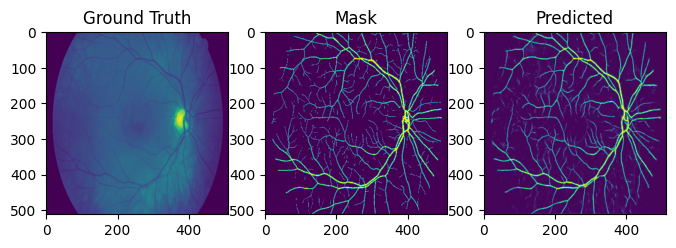

15/15 [==============================] - 4s 281ms/step - loss: 0.0696 - accuracy: 0.9783 - val_loss: 0.0998 - val_accuracy: 0.9666
Epoch 91/300
15/15 [==============================] - 4s 266ms/step - loss: 0.0690 - accuracy: 0.9784 - val_loss: 0.0993 - val_accuracy: 0.9668
Epoch 92/300
15/15 [==============================] - 3s 206ms/step - loss: 0.0686 - accuracy: 0.9783 - val_loss: 0.0995 - val_accuracy: 0.9667
Epoch 93/300
15/15 [==============================] - 3s 205ms/step - loss: 0.0674 - accuracy: 0.9789 - val_loss: 0.0994 - val_accuracy: 0.9666
Epoch 94/300
15/15 [==============================] - 4s 267ms/step - loss: 0.0669 - accuracy: 0.9789 - val_loss: 0.0989 - val_accuracy: 0.9667
Epoch 95/300
15/15 [==============================] - 3s 206ms/step - loss: 0.0663 - accuracy: 0.9790 - val_loss: 0.0994 - val_accuracy: 0.9664
Epoch 96/300
1/1 [==============================] - 0s 16ms/steploss: 0.0655 - accuracy: 0.97


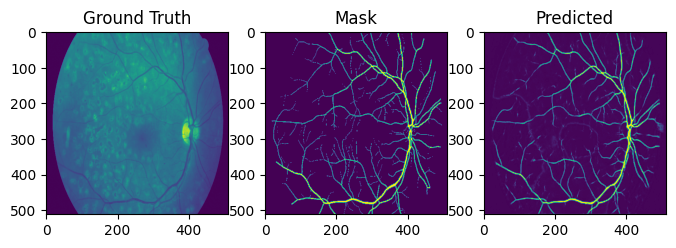

15/15 [==============================] - 4s 288ms/step - loss: 0.0655 - accuracy: 0.9793 - val_loss: 0.0988 - val_accuracy: 0.9666
Epoch 97/300
15/15 [==============================] - 4s 269ms/step - loss: 0.0649 - accuracy: 0.9794 - val_loss: 0.0985 - val_accuracy: 0.9666
Epoch 98/300
15/15 [==============================] - 3s 205ms/step - loss: 0.0645 - accuracy: 0.9795 - val_loss: 0.0988 - val_accuracy: 0.9665
Epoch 99/300
15/15 [==============================] - 4s 264ms/step - loss: 0.0642 - accuracy: 0.9795 - val_loss: 0.0982 - val_accuracy: 0.9667
Epoch 100/300
15/15 [==============================] - 4s 268ms/step - loss: 0.0631 - accuracy: 0.9799 - val_loss: 0.0982 - val_accuracy: 0.9665
Epoch 101/300
15/15 [==============================] - 4s 263ms/step - loss: 0.0627 - accuracy: 0.9799 - val_loss: 0.0982 - val_accuracy: 0.9664
Epoch 102/300
1/1 [==============================] - 0s 16ms/steploss: 0.0617 - accuracy: 0.98


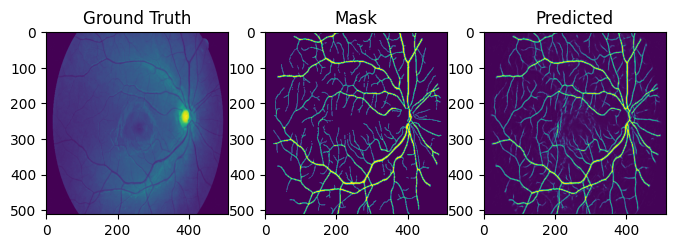

15/15 [==============================] - 4s 283ms/step - loss: 0.0617 - accuracy: 0.9804 - val_loss: 0.0979 - val_accuracy: 0.9666
Epoch 103/300
15/15 [==============================] - 3s 206ms/step - loss: 0.0613 - accuracy: 0.9803 - val_loss: 0.0984 - val_accuracy: 0.9663
Epoch 104/300
15/15 [==============================] - 4s 263ms/step - loss: 0.0608 - accuracy: 0.9805 - val_loss: 0.0976 - val_accuracy: 0.9666
Epoch 105/300
15/15 [==============================] - 3s 206ms/step - loss: 0.0604 - accuracy: 0.9806 - val_loss: 0.0978 - val_accuracy: 0.9666
Epoch 106/300
15/15 [==============================] - 4s 263ms/step - loss: 0.0597 - accuracy: 0.9808 - val_loss: 0.0975 - val_accuracy: 0.9666
Epoch 107/300
15/15 [==============================] - 3s 206ms/step - loss: 0.0595 - accuracy: 0.9807 - val_loss: 0.0977 - val_accuracy: 0.9665
Epoch 108/300
1/1 [==============================] - 0s 16ms/steploss: 0.0583 - accuracy: 0.98


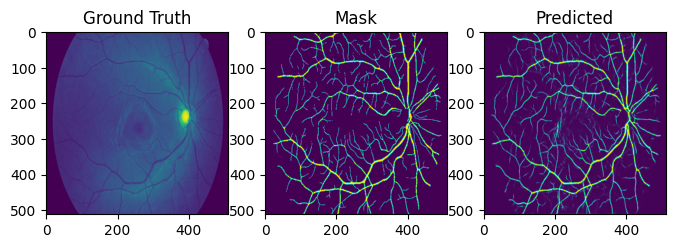

15/15 [==============================] - 3s 224ms/step - loss: 0.0583 - accuracy: 0.9812 - val_loss: 0.0979 - val_accuracy: 0.9663
Epoch 109/300
15/15 [==============================] - 3s 206ms/step - loss: 0.0573 - accuracy: 0.9817 - val_loss: 0.0981 - val_accuracy: 0.9663
Epoch 110/300
15/15 [==============================] - 3s 206ms/step - loss: 0.0576 - accuracy: 0.9814 - val_loss: 0.0977 - val_accuracy: 0.9665
Epoch 111/300
15/15 [==============================] - 4s 269ms/step - loss: 0.0565 - accuracy: 0.9818 - val_loss: 0.0975 - val_accuracy: 0.9664
Epoch 112/300
15/15 [==============================] - 3s 206ms/step - loss: 0.0567 - accuracy: 0.9816 - val_loss: 0.0975 - val_accuracy: 0.9665
Epoch 113/300
15/15 [==============================] - 3s 206ms/step - loss: 0.0558 - accuracy: 0.9819 - val_loss: 0.0976 - val_accuracy: 0.9665
Epoch 114/300
1/1 [==============================] - 0s 15ms/steploss: 0.0557 - accuracy: 0.98


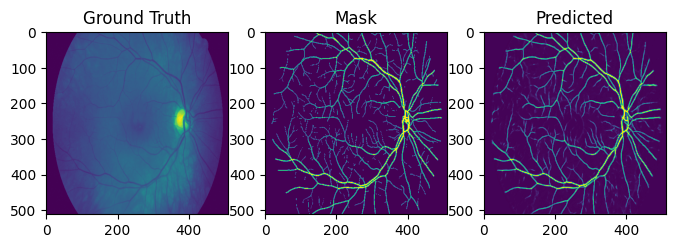

15/15 [==============================] - 3s 224ms/step - loss: 0.0557 - accuracy: 0.9819 - val_loss: 0.0984 - val_accuracy: 0.9662
Epoch 115/300
15/15 [==============================] - 3s 206ms/step - loss: 0.0562 - accuracy: 0.9815 - val_loss: 0.0978 - val_accuracy: 0.9664
Epoch 116/300
15/15 [==============================] - 3s 206ms/step - loss: 0.0542 - accuracy: 0.9823 - val_loss: 0.0977 - val_accuracy: 0.9663
Epoch 117/300
15/15 [==============================] - 3s 206ms/step - loss: 0.0540 - accuracy: 0.9824 - val_loss: 0.0977 - val_accuracy: 0.9663
Epoch 118/300
15/15 [==============================] - 4s 266ms/step - loss: 0.0531 - accuracy: 0.9827 - val_loss: 0.0974 - val_accuracy: 0.9664
Epoch 119/300
15/15 [==============================] - 3s 206ms/step - loss: 0.0524 - accuracy: 0.9830 - val_loss: 0.0981 - val_accuracy: 0.9663
Epoch 120/300
1/1 [==============================] - 0s 16ms/steploss: 0.0520 - accuracy: 0.98


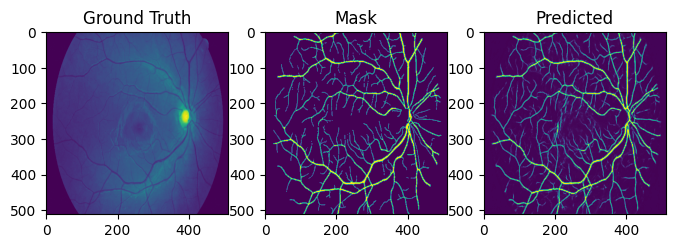

15/15 [==============================] - 4s 281ms/step - loss: 0.0520 - accuracy: 0.9831 - val_loss: 0.0973 - val_accuracy: 0.9664
Epoch 121/300
15/15 [==============================] - 3s 206ms/step - loss: 0.0514 - accuracy: 0.9833 - val_loss: 0.0982 - val_accuracy: 0.9662
Epoch 122/300
15/15 [==============================] - 3s 206ms/step - loss: 0.0516 - accuracy: 0.9831 - val_loss: 0.0988 - val_accuracy: 0.9661
Epoch 123/300
15/15 [==============================] - 3s 206ms/step - loss: 0.0513 - accuracy: 0.9832 - val_loss: 0.0984 - val_accuracy: 0.9661
Epoch 124/300
15/15 [==============================] - 3s 206ms/step - loss: 0.0502 - accuracy: 0.9836 - val_loss: 0.0982 - val_accuracy: 0.9662
Epoch 125/300
15/15 [==============================] - 3s 206ms/step - loss: 0.0504 - accuracy: 0.9834 - val_loss: 0.0985 - val_accuracy: 0.9662
Epoch 126/300
1/1 [==============================] - 0s 16ms/steploss: 0.0492 - accuracy: 0.98


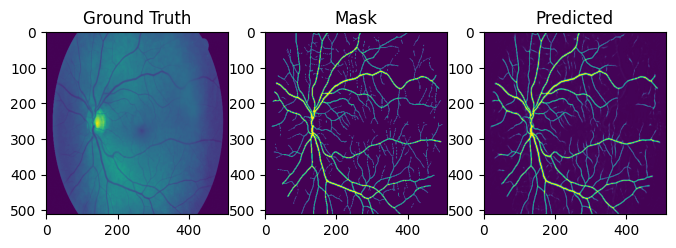

15/15 [==============================] - 3s 224ms/step - loss: 0.0492 - accuracy: 0.9840 - val_loss: 0.0987 - val_accuracy: 0.9660
Epoch 127/300
15/15 [==============================] - 3s 206ms/step - loss: 0.0489 - accuracy: 0.9840 - val_loss: 0.0988 - val_accuracy: 0.9662
Epoch 128/300
15/15 [==============================] - 3s 205ms/step - loss: 0.0487 - accuracy: 0.9840 - val_loss: 0.0986 - val_accuracy: 0.9660
Epoch 129/300
15/15 [==============================] - 3s 206ms/step - loss: 0.0489 - accuracy: 0.9838 - val_loss: 0.0986 - val_accuracy: 0.9661
Epoch 130/300
15/15 [==============================] - 3s 206ms/step - loss: 0.0470 - accuracy: 0.9848 - val_loss: 0.0984 - val_accuracy: 0.9662
Epoch 131/300
15/15 [==============================] - 3s 205ms/step - loss: 0.0475 - accuracy: 0.9844 - val_loss: 0.0987 - val_accuracy: 0.9662
Epoch 132/300
1/1 [==============================] - 0s 15ms/steploss: 0.0471 - accuracy: 0.98


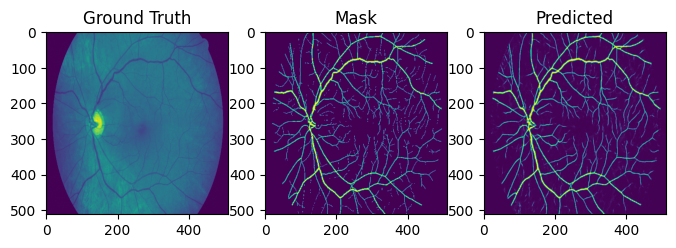

15/15 [==============================] - 3s 224ms/step - loss: 0.0471 - accuracy: 0.9845 - val_loss: 0.0988 - val_accuracy: 0.9661
Epoch 133/300
15/15 [==============================] - 3s 206ms/step - loss: 0.0465 - accuracy: 0.9847 - val_loss: 0.0990 - val_accuracy: 0.9661
Epoch 134/300
15/15 [==============================] - 3s 206ms/step - loss: 0.0471 - accuracy: 0.9843 - val_loss: 0.0991 - val_accuracy: 0.9658
Epoch 135/300
15/15 [==============================] - 3s 206ms/step - loss: 0.0461 - accuracy: 0.9848 - val_loss: 0.0997 - val_accuracy: 0.9661
Epoch 136/300
15/15 [==============================] - 3s 206ms/step - loss: 0.0453 - accuracy: 0.9851 - val_loss: 0.0997 - val_accuracy: 0.9659
Epoch 137/300
15/15 [==============================] - 3s 206ms/step - loss: 0.0455 - accuracy: 0.9850 - val_loss: 0.0999 - val_accuracy: 0.9660
Epoch 138/300
1/1 [==============================] - 0s 16ms/steploss: 0.0454 - accuracy: 0.98


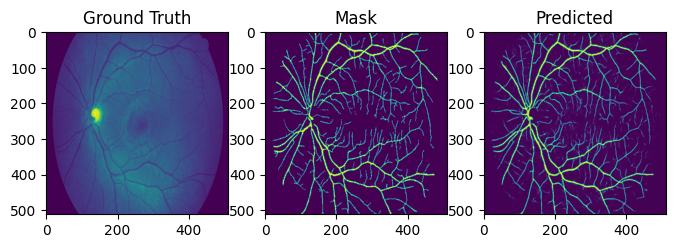

15/15 [==============================] - 3s 224ms/step - loss: 0.0454 - accuracy: 0.9848 - val_loss: 0.0993 - val_accuracy: 0.9660
Epoch 139/300
15/15 [==============================] - 3s 206ms/step - loss: 0.0446 - accuracy: 0.9853 - val_loss: 0.0997 - val_accuracy: 0.9661
Epoch 140/300
15/15 [==============================] - 3s 205ms/step - loss: 0.0437 - accuracy: 0.9857 - val_loss: 0.0994 - val_accuracy: 0.9661


In [8]:
model = sm.Unet('efficientnetb0', classes=1, activation='sigmoid')
model.compile(optimizer=Adam(0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# model.load_weights('unet_effnetb0.h5') # comment this line if no training was performed previously

history = model.fit(
    train_generator,
    validation_data=val_generator,
    callbacks=[PlotCallback(val_generator, num_epochs=6),
              ModelCheckpoint('unet_effnetb0.h5', save_best_only=True),
              EarlyStopping(patience=20)],
    epochs=300
)

## Results
#### Accuracy and loss during training

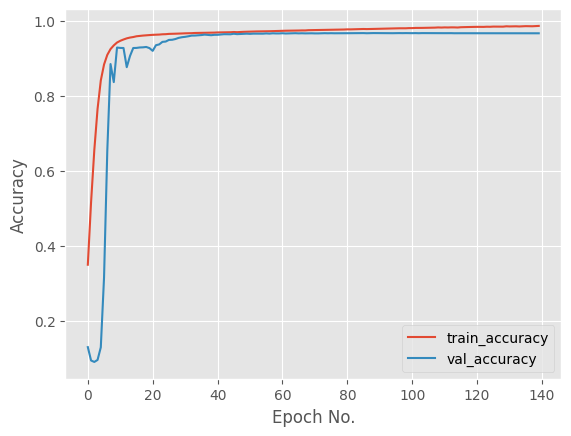

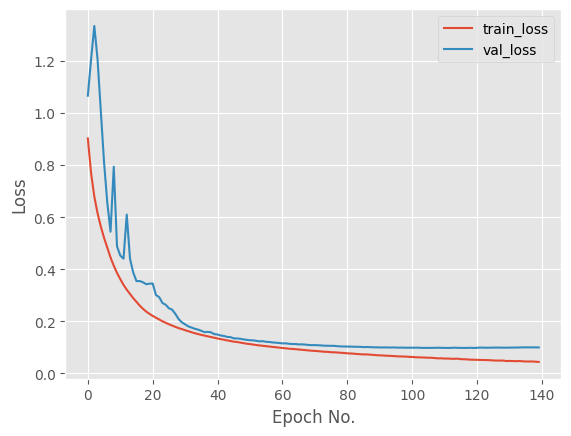

In [9]:
plt.style.use('ggplot')

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch No.')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylabel('Loss')
plt.xlabel('Epoch No.')
plt.legend()
plt.show()

#### Some fine-tuning

In [ ]:
# model = sm.Unet('efficientnetb0', classes=1, activation='sigmoid')

# model.compile(optimizer=Adam(0.00001), loss='binary_crossentropy', metrics=['accuracy'])
# model.load_weights('unet_effnetb0_2.h5')

# model.fit(
#     train_generator,
#     validation_data=val_generator,
#     epochs=10
# )

#### Classification report on test set

In [10]:
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()
y_test = y_test.flatten()
_, y_pred = cv2.threshold(y_pred, 0.5, 1, cv2.THRESH_BINARY)
y_pred = y_pred.astype(np.uint8)

1/1 [==============================] - 0s 25ms/step


In [11]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99   1221149
           1       0.86      0.91      0.89     89571

    accuracy                           0.98   1310720
   macro avg       0.93      0.95      0.94   1310720
weighted avg       0.98      0.98      0.98   1310720

